<a href="https://colab.research.google.com/github/steffiangel/Predictive-Analytics/blob/main/2348510_lab6_pa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis and Time Series Visualization

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = yf.download("AAPL", start="2018-01-01", end="2023-12-31")
df.to_csv("/content/HistoricalQuotes.csv")
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values)




[*********************100%***********************]  1 of 1 completed

Missing values before handling:
 Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64


In [ ]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-01-02 00:00:00+00:00,40.524342,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03 00:00:00+00:00,40.517292,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04 00:00:00+00:00,40.705486,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05 00:00:00+00:00,41.168930,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08 00:00:00+00:00,41.016029,43.587502,43.902500,43.482498,43.587502,82271200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2018-01-02 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  1509 non-null   float64
 1   (Close, AAPL)      1509 non-null   float64
 2   (High, AAPL)       1509 non-null   float64
 3   (Low, AAPL)        1509 non-null   float64
 4   (Open, AAPL)       1509 non-null   float64
 5   (Volume, AAPL)     1509 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.5 KB


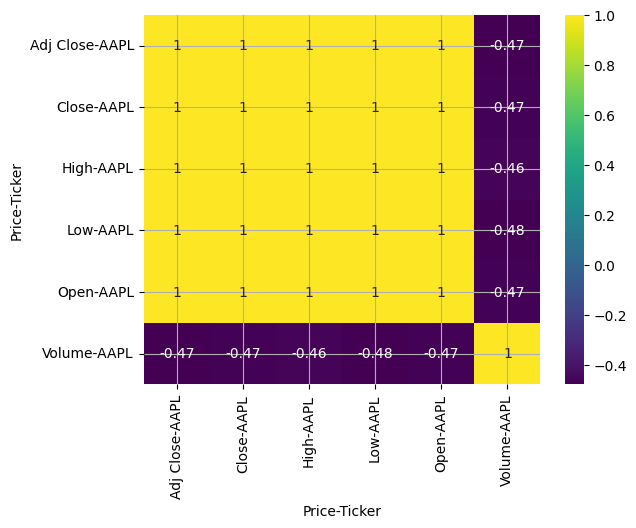

In [ ]:
from sys import platform
corr=df.corr()
sns.heatmap(corr,annot=True, cmap='viridis')

plt.grid()
plt.show()

<Axes: >

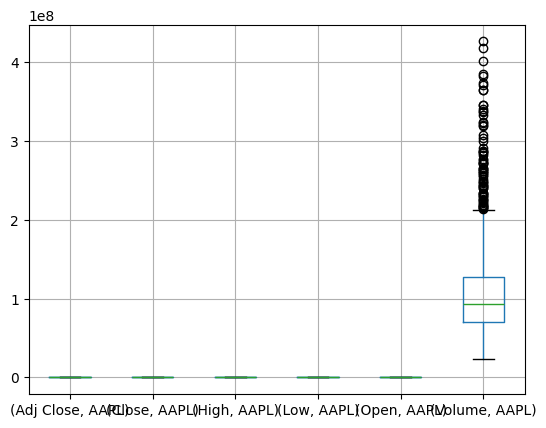

In [ ]:
df.boxplot()

<Axes: >

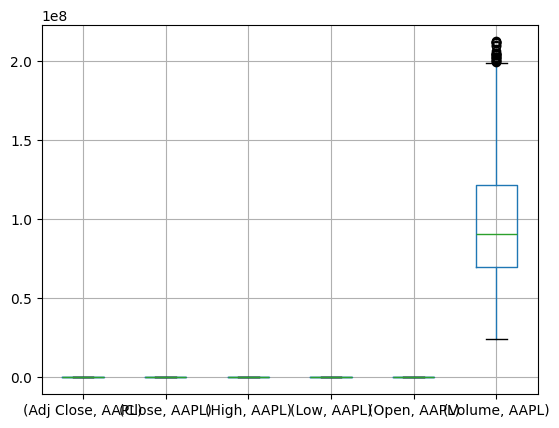

In [ ]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)

IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]

df.boxplot()

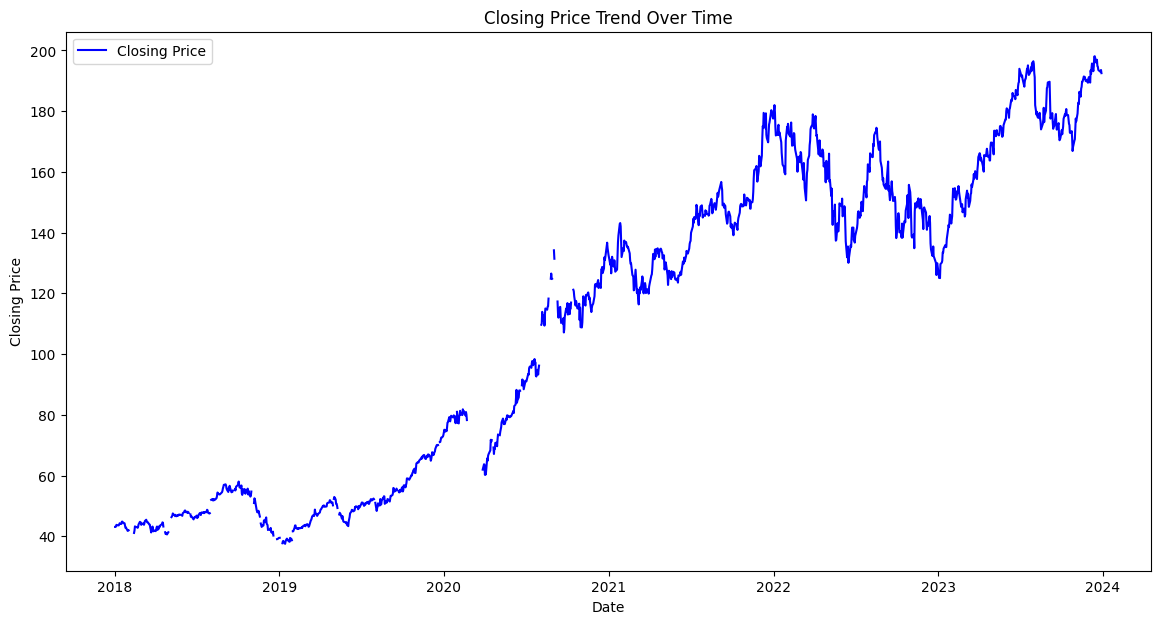

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label="Closing Price", color='blue')
plt.title('Closing Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


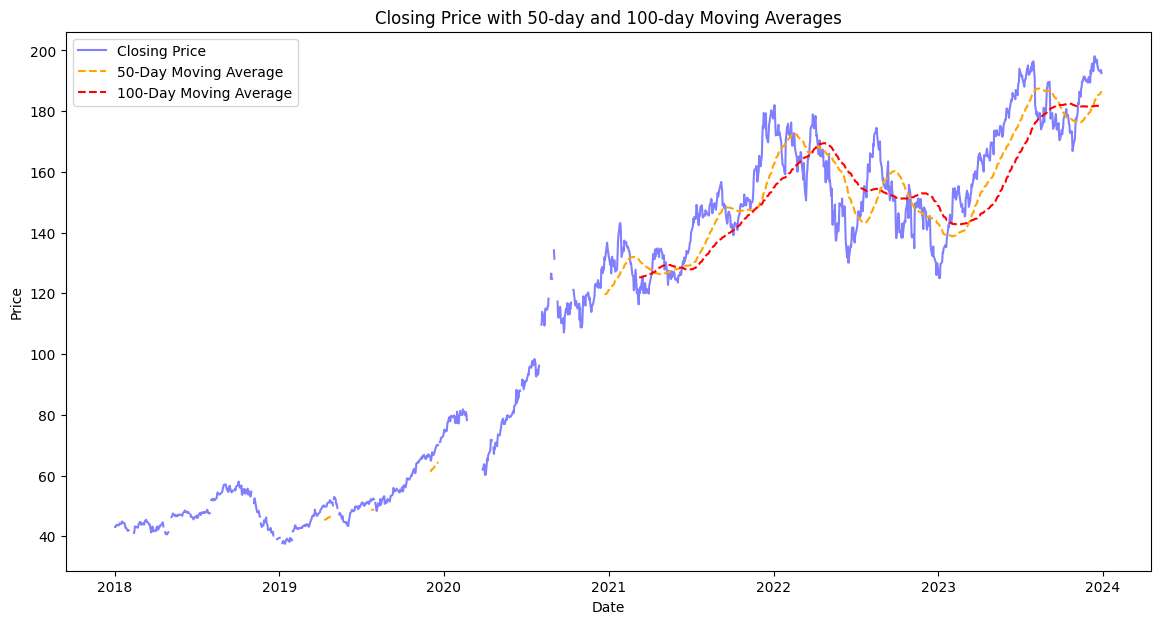

In [ ]:

# Calculating Moving Averages
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['100_MA'] = df['Close'].rolling(window=100).mean()

# Plotting Closing Price with 50-day and 100-day Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label="Closing Price", color='blue', alpha=0.5)
plt.plot(df.index, df['50_MA'], label="50-Day Moving Average", color='orange', linestyle='--')
plt.plot(df.index, df['100_MA'], label="100-Day Moving Average", color='red', linestyle='--')
plt.title('Closing Price with 50-day and 100-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#A moving average smooths data by averaging recent points to reveal trends.

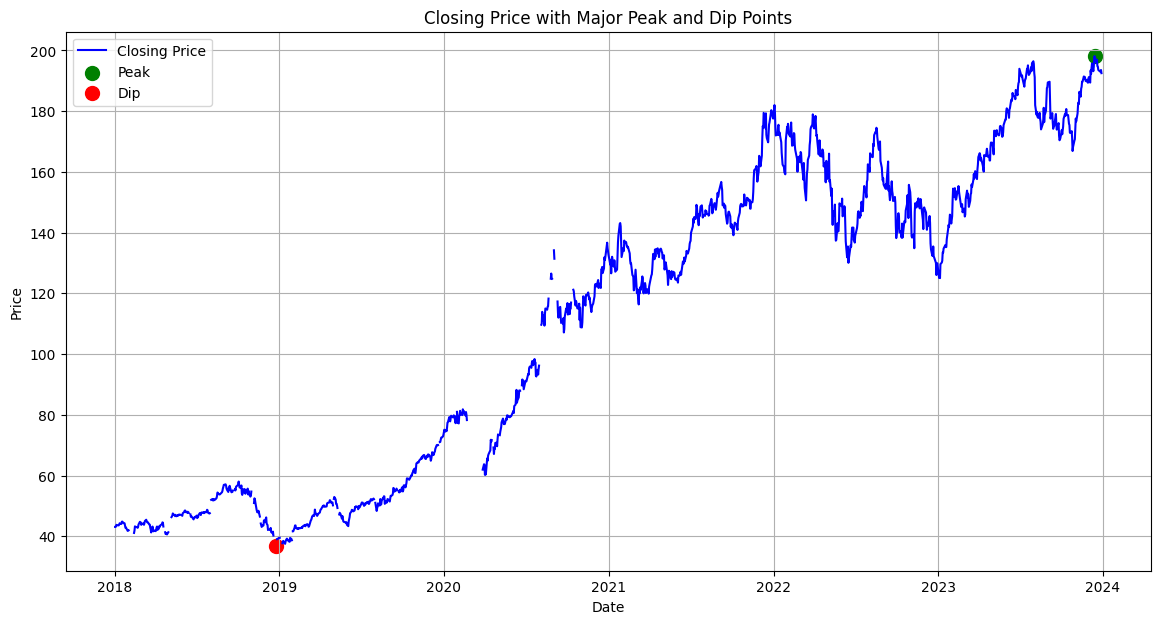

In [ ]:
df['Daily_Change'] = df['Close'].diff()

# Identify peak and dip
peak = df['Close'].idxmax()
dip = df['Close'].idxmin()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label="Closing Price", color='blue')
plt.scatter(peak, df['Close'].loc[peak], color='green', s=100, label="Peak")
plt.scatter(dip, df['Close'].loc[dip], color='red', s=100, label="Dip")
plt.title('Closing Price with Major Peak and Dip Points')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

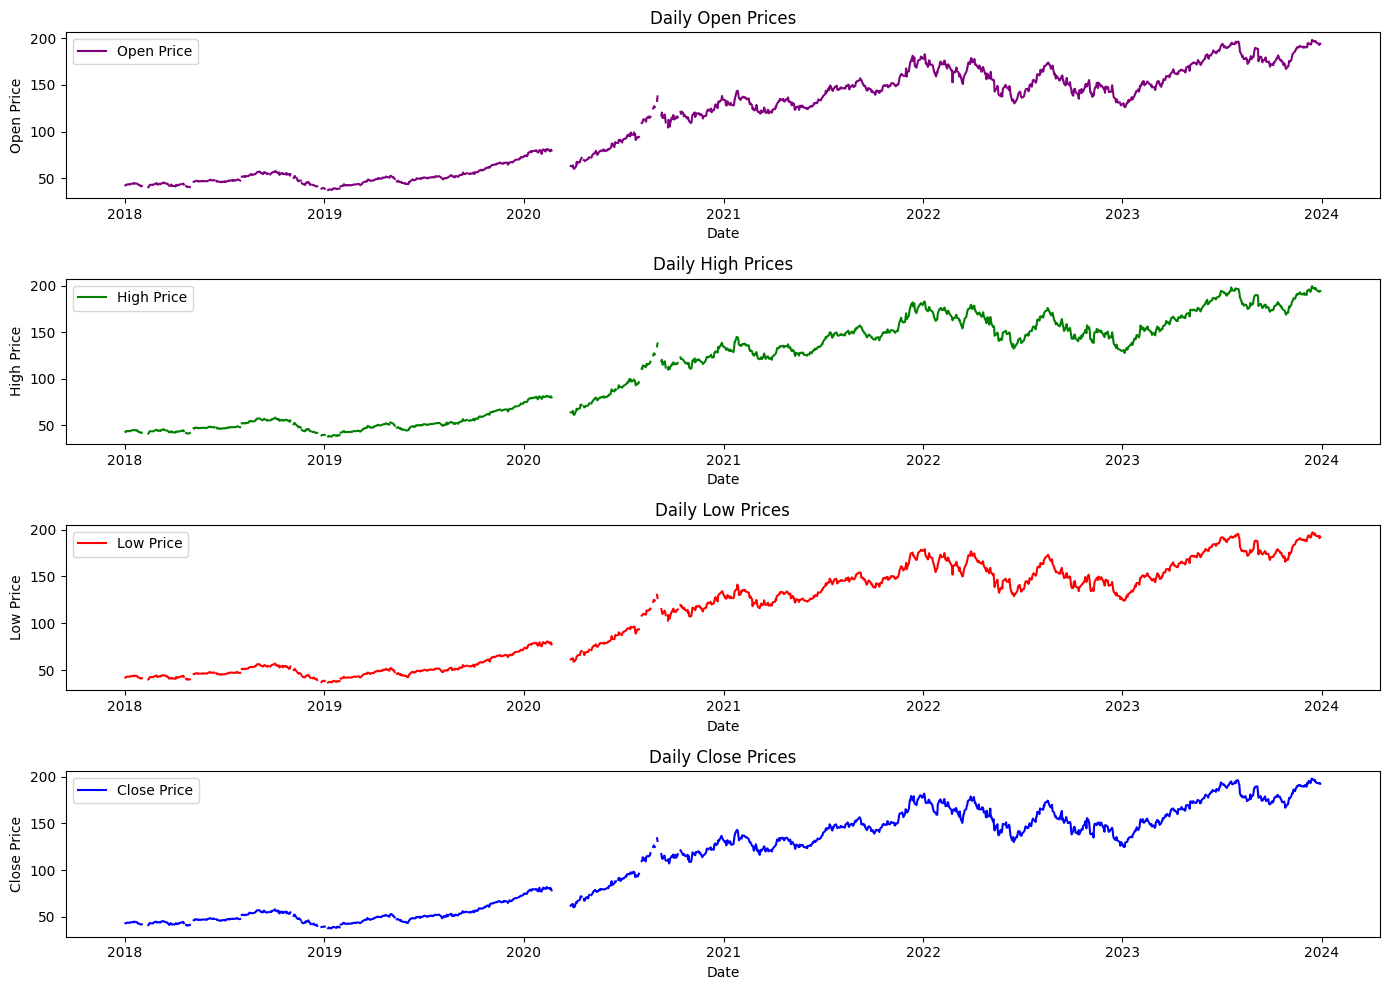

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plotting Open, High, Low, and Close prices using subplots
plt.figure(figsize=(14, 10))

# Plot Daily Open Prices
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Open'], color='purple', label='Open Price')
plt.title('Daily Open Prices')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()

# Plot Daily High Prices
plt.subplot(4, 1, 2)
plt.plot(df.index, df['High'], color='green', label='High Price')
plt.title('Daily High Prices')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()

# Plot Daily Low Prices
plt.subplot(4, 1, 3)
plt.plot(df.index, df['Low'], color='red', label='Low Price')
plt.title('Daily Low Prices')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend()

# Plot Daily Close Prices
plt.subplot(4, 1, 4)
plt.plot(df.index, df['Close'], color='blue', label='Close Price')
plt.title('Daily Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout()
plt.show()



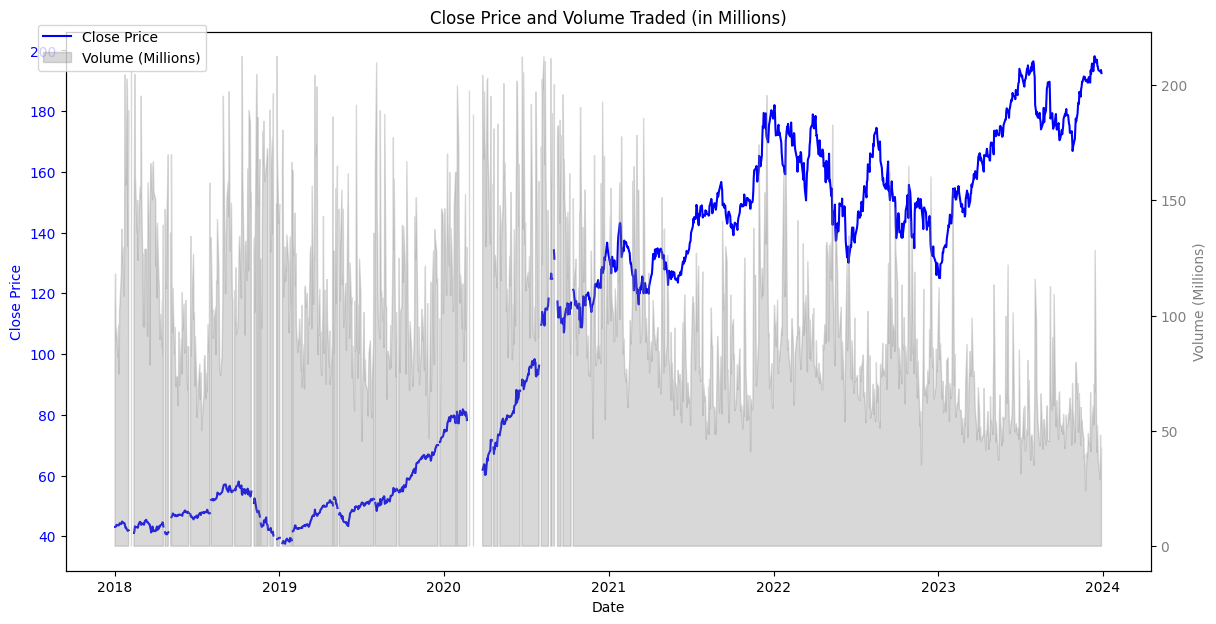

In [ ]:

df['Volume_Millions'] = df['Volume'] / 1_000_000
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Close Price
ax1.plot(df.index, df['Close'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Close Price and Volume Traded (in Millions)')

# Create a second y-axis to plot Volume (in millions) using fill_between
ax2 = ax1.twinx()
ax2.fill_between(df.index, 0, df['Volume_Millions'], color='grey', alpha=0.3, label='Volume (Millions)')
ax2.set_ylabel('Volume (Millions)', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

# Add legends for both axes
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
#how many no of stocks has been traded
plt.show()



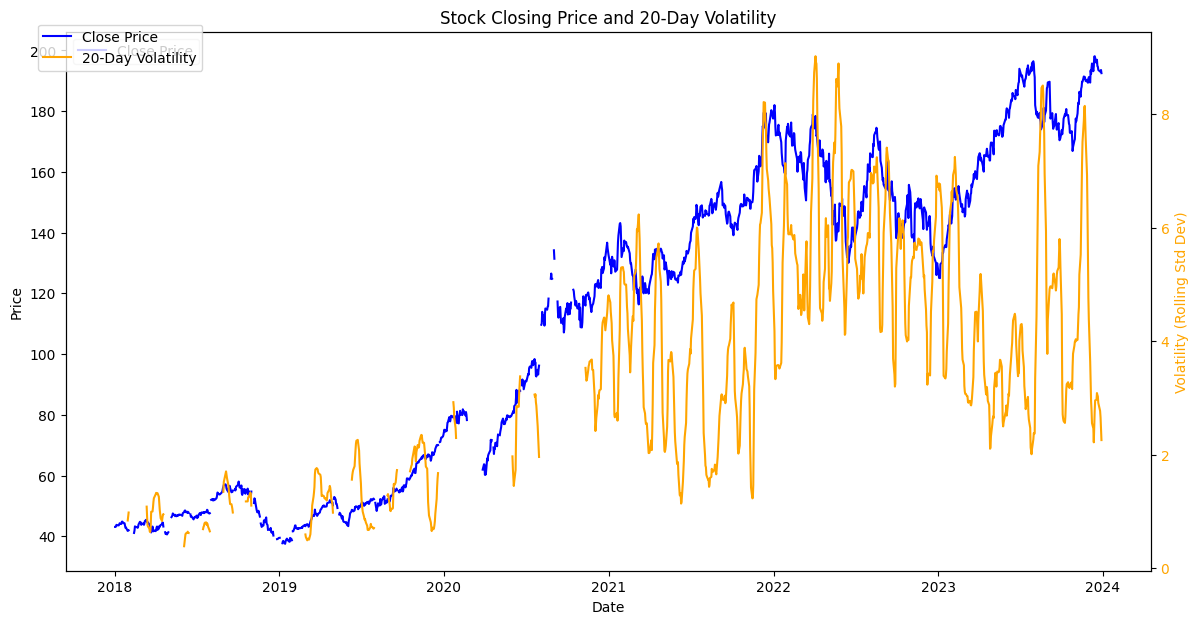

In [ ]:

df['Volatility_20d'] = df['Close'].rolling(window=20).std()


plt.figure(figsize=(14, 7))

plt.plot(df.index, df['Close'], color='blue', label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Closing Price and 20-Day Volatility')
plt.legend(loc='upper left')


ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df.index, df['Volatility_20d'], color='orange', label='20-Day Volatility')
ax2.set_ylabel('Volatility (Rolling Std Dev)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')


fig = plt.gcf()
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Close'], order=(5, 1, 0))
model_fit = model.fit()




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [ ]:
forecast = model_fit.forecast(steps=30)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')  # 'B' for business days
forecast_series = pd.Series(forecast, index=forecast_index)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


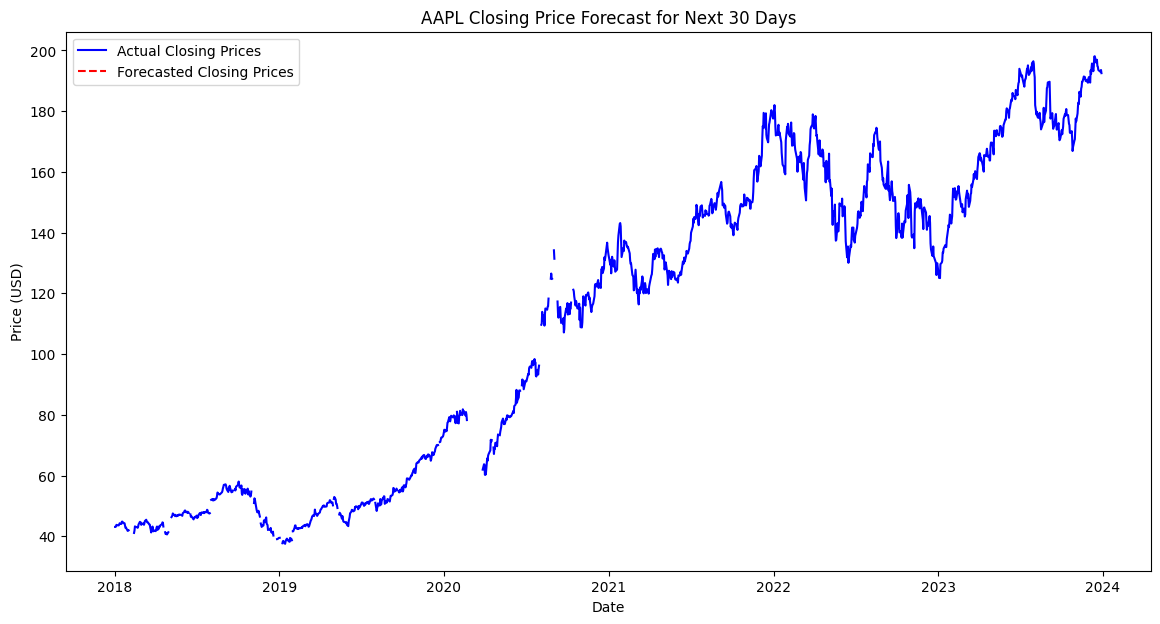

In [ ]:

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Actual Closing Prices', color='blue')
plt.plot(forecast_series, label='Forecasted Closing Prices', color='red', linestyle='--')
plt.title('AAPL Closing Price Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Why the Forecast is Not Working?
The ARIMA model forecast for Apple Inc. (AAPL) stock is not working as expected due to several issues:

Non-Stationarity: The data fails the stationarity test (ADF test), meaning it has trends or patterns that violate ARIMA's assumption of constant mean and variance over time.

Differencing: Attempts to make the data stationary through differencing resulted in an empty or problematic series, preventing effective model fitting.

ARIMA Model Order: The chosen ARIMA order (5, 1, 0) may not be optimal. Proper analysis using ACF/PACF plots is needed to determine the best parameters.

External Factors: Stock prices are influenced by factors beyond historical prices, such as market sentiment and news, which ARIMA cannot capture.

Model Tuning: The ARIMA model may be either overfitting or underfitting the data, leading to inaccurate predictions.

Conclusion:
The main issues are non-stationary data and the limitations of the ARIMA model in handling external influences. To improve forecasts, stationarity should be addressed, the model order adjusted, and potentially external factors included in the model.
